In [ ]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium #for maps
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12 

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
data=pd.read_csv('/content/gdrive/My Drive/fakeshit.csv')

In [ ]:
data

,SNo,ObservationDate,Province-State,Country-Region,Last Update,Confirmed,Deaths,Recovered
0,1,01-22-2020,Anhui,Mainland China,1-22-2020 17:00,1,0,0
1,2,01-22-2020,Beijing,Mainland China,1-22-2020 17:00,14,0,0
2,3,01-22-2020,Chongqing,Mainland China,1-22-2020 17:00,6,0,0
3,4,01-22-2020,Fujian,Mainland China,1-22-2020 17:00,1,0,0
4,5,01-22-2020,Gansu,Mainland China,1-22-2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
75233,75234,07-29-2020,Zaporizhia Oblast,Ukraine,30-07-2020 04:35,767,21,582
75234,75235,07-29-2020,Zeeland,Netherlands,30-07-2020 04:35,851,69,0
75235,75236,07-29-2020,Zhejiang,Mainland China,30-07-2020 04:35,1270,1,1268
75236,75237,07-29-2020,Zhytomyr Oblast,Ukraine,30-07-2020 04:35,1764,36,1431


In [ ]:
data.drop(['SNo','Province-State','Last Update'], axis = 1)

,ObservationDate,Country-Region,Confirmed,Deaths,Recovered
0,01-22-2020,Mainland China,1,0,0
1,01-22-2020,Mainland China,14,0,0
2,01-22-2020,Mainland China,6,0,0
3,01-22-2020,Mainland China,1,0,0
4,01-22-2020,Mainland China,0,0,0
...,...,...,...,...,...
75233,07-29-2020,Ukraine,767,21,582
75234,07-29-2020,Netherlands,851,69,0
75235,07-29-2020,Mainland China,1270,1,1268
75236,07-29-2020,Ukraine,1764,36,1431


In [ ]:
data['Country-Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [ ]:
data.rename(columns = {'Country-Region':'Country'}, inplace = True) 

In [ ]:
data.rename(columns = {'ObservationDate':'Date'}, inplace = True)

In [ ]:
india=data.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
us=data.query('Country=="US"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
brazil=data.query('Country=="Brazil"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
italy=data.query('Country=="Italy"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
uk=data.query('Country=="UK"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


In [ ]:
#INDIA

In [ ]:
india

,Date,Confirmed,Deaths,Recovered
0,01-30-2020,1,0,0
1,01-31-2020,1,0,0
2,02-01-2020,1,0,0
3,02-02-2020,2,0,0
4,02-03-2020,3,0,0
...,...,...,...,...
177,07-25-2020,1385635,32060,885573
178,07-26-2020,1435616,32771,917568
179,07-27-2020,1480073,33408,951166
180,07-28-2020,1483156,33425,952743


In [ ]:
india.groupby('Date').sum().head()

,Confirmed,Deaths,Recovered
Date,,,
01-30-2020,1,0,0
01-31-2020,1,0,0
02-01-2020,1,0,0
02-02-2020,2,0,0
02-03-2020,3,0,0


In [ ]:
india.groupby('Date').sum().tail()

,Confirmed,Deaths,Recovered
Date,,,
07-25-2020,1385635,32060,885573
07-26-2020,1435616,32771,917568
07-27-2020,1480073,33408,951166
07-28-2020,1483156,33425,952743
07-29-2020,1581963,34955,1019735


In [ ]:
confirmed = india.groupby('Date').sum()['Confirmed'].reset_index()
deaths = india.groupby('Date').sum()['Deaths'].reset_index()
recovered = india.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed

,Date,Confirmed
0,01-30-2020,1
1,01-31-2020,1
2,02-01-2020,1
3,02-02-2020,2
4,02-03-2020,3
...,...,...
177,07-25-2020,1385635
178,07-26-2020,1435616
179,07-27-2020,1480073
180,07-28-2020,1483156


In [ ]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Indiawide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = india.groupby('Date').sum()['Confirmed'].reset_index()
deaths = india.groupby('Date').sum()['Deaths'].reset_index()
recovered = india.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
confirmed.tail(4)

,ds,y
178,2020-07-26,1435616
179,2020-07-27,1480073
180,2020-07-28,1483156
181,2020-07-29,1581963


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
184,2020-08-01
185,2020-08-02
186,2020-08-03
187,2020-08-04
188,2020-08-05


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(2)

,ds,yhat,yhat_lower,yhat_upper
187,2020-08-04,1.601069e+06,1.547837e+06,1.651093e+06
188,2020-08-05,1.632035e+06,1.579682e+06,1.685548e+06


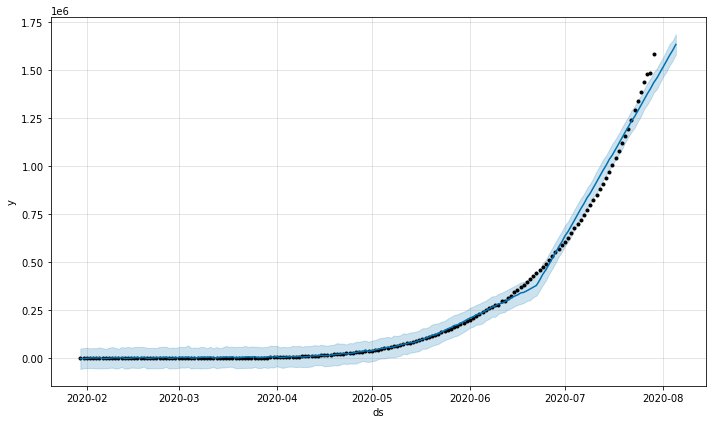

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

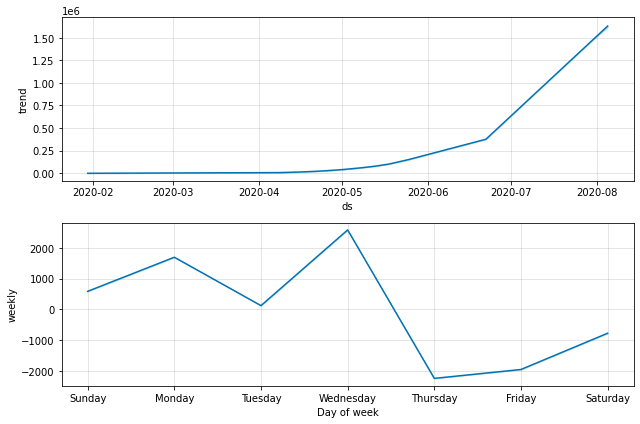

In [ ]:
confirmed_forecast_plot =m.plot_components(forecast)

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=60)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
237,2020-09-23
238,2020-09-24
239,2020-09-25
240,2020-09-26
241,2020-09-27


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
237,2020-09-23,3.028951e+06,2.745607e+06,3.347703e+06
238,2020-09-24,3.052639e+06,2.773230e+06,3.393798e+06
239,2020-09-25,3.081436e+06,2.776226e+06,3.437635e+06
240,2020-09-26,3.111121e+06,2.817627e+06,3.456238e+06
241,2020-09-27,3.140991e+06,2.826646e+06,3.500403e+06


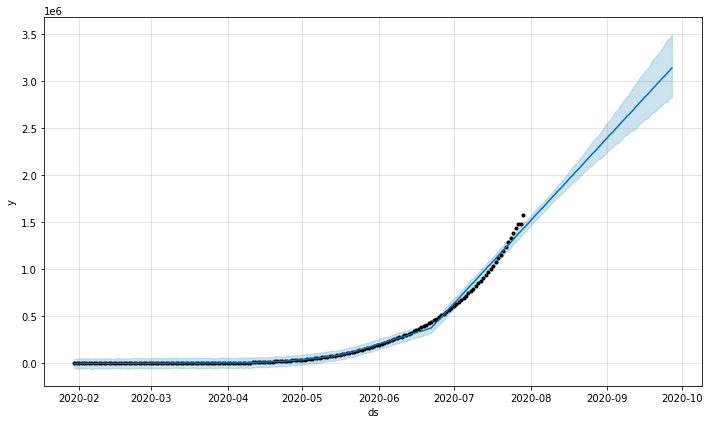

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

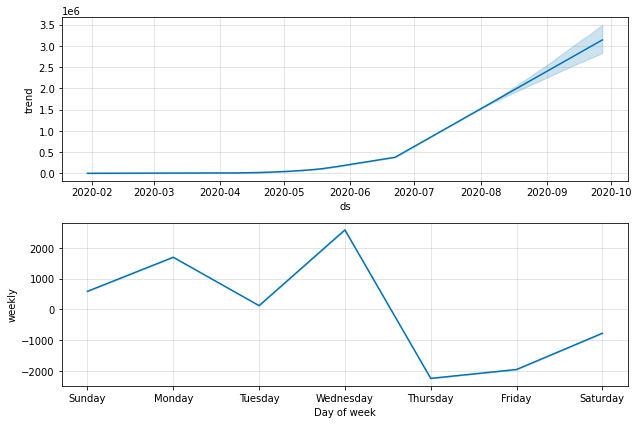

In [ ]:
confirmed_forecast_plot =m.plot_components(forecast)

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=60)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
237,2020-09-23
238,2020-09-24
239,2020-09-25
240,2020-09-26
241,2020-09-27


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
237,2020-09-23,63479.609329,57773.230965,69267.408000
238,2020-09-24,63964.432692,58109.015936,69955.921190
239,2020-09-25,64489.970526,58253.556315,70564.812194
240,2020-09-26,65026.960449,59047.205017,71587.638785
241,2020-09-27,65558.793025,59282.919106,71994.156686


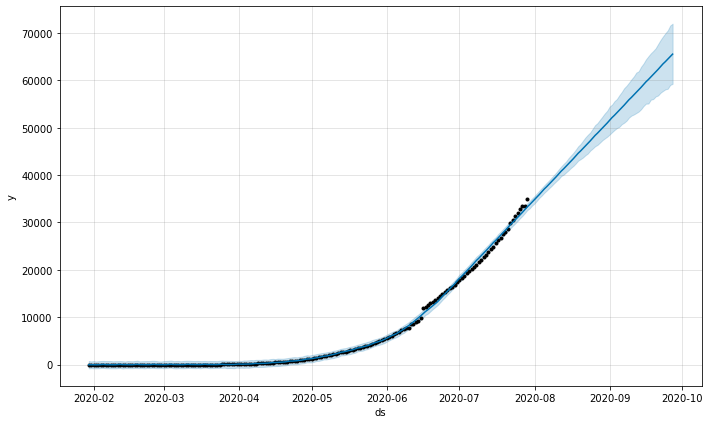

In [ ]:
deaths_forecast_plot = m.plot(forecast)

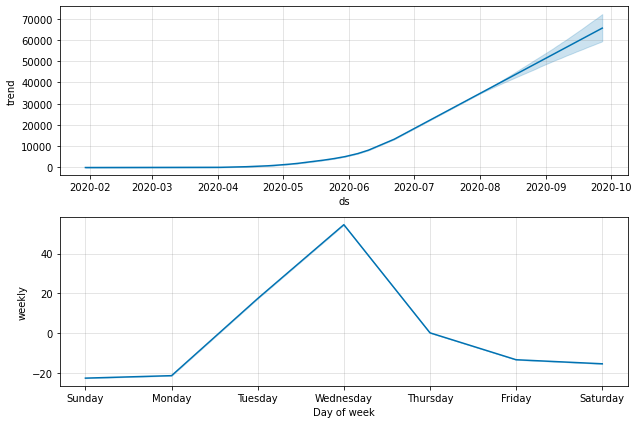

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=60)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
237,2020-09-23
238,2020-09-24
239,2020-09-25
240,2020-09-26
241,2020-09-27


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
237,2020-09-23,1.983019e+06,1.781159e+06,2.176203e+06
238,2020-09-24,1.998934e+06,1.793934e+06,2.193668e+06
239,2020-09-25,2.018077e+06,1.809932e+06,2.230509e+06
240,2020-09-26,2.037972e+06,1.813356e+06,2.246376e+06
241,2020-09-27,2.057452e+06,1.837990e+06,2.264290e+06


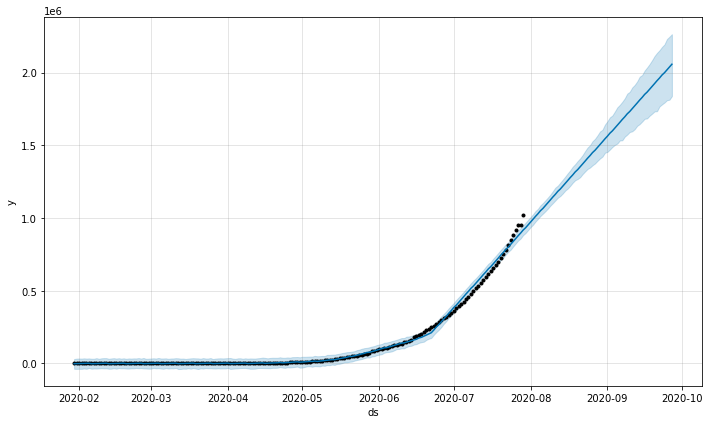

In [ ]:
recovered_forecast_plot = m.plot(forecast)

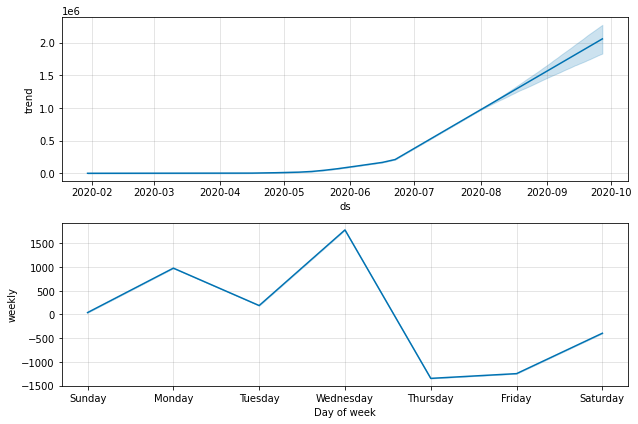

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)

In [ ]:
#US

In [ ]:
us

,Date,Confirmed,Deaths,Recovered
0,01-22-2020,1,0,0
1,01-23-2020,1,0,0
2,01-24-2020,2,0,0
3,01-25-2020,2,0,0
4,01-26-2020,5,0,0
...,...,...,...,...
185,07-25-2020,4178021,146460,1279414
186,07-26-2020,4233923,146935,1297863
187,07-27-2020,4290337,148012,1325804
188,07-28-2020,4356206,149310,1355363


In [ ]:
us.groupby('Date').sum().head()

,Confirmed,Deaths,Recovered
Date,,,
01-22-2020,1,0,0
01-23-2020,1,0,0
01-24-2020,2,0,0
01-25-2020,2,0,0
01-26-2020,5,0,0


In [ ]:
us.groupby('Date').sum().tail()

,Confirmed,Deaths,Recovered
Date,,,
07-25-2020,4178021,146460,1279414
07-26-2020,4233923,146935,1297863
07-27-2020,4290337,148012,1325804
07-28-2020,4356206,149310,1355363
07-29-2020,4426982,150713,1389425


In [ ]:
confirmed_us = us.groupby('Date').sum()['Confirmed'].reset_index()
deaths_us = us.groupby('Date').sum()['Deaths'].reset_index()
recovered_us = us.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed_us

,Date,Confirmed
0,01-22-2020,1
1,01-23-2020,1
2,01-24-2020,2
3,01-25-2020,2
4,01-26-2020,5
...,...,...
185,07-25-2020,4178021
186,07-26-2020,4233923
187,07-27-2020,4290337
188,07-28-2020,4356206


In [ ]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed_us['Date'], y=confirmed_us['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths_us['Date'], y=deaths_us['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered_us['Date'], y=recovered_us['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='US NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [ ]:
confirmed_us.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed_us['ds'] = pd.to_datetime(confirmed_us['ds'])

In [ ]:
confirmed_us.tail(4)

,ds,y
186,2020-07-26,4233923
187,2020-07-27,4290337
188,2020-07-28,4356206
189,2020-07-29,4426982


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed_us)
future_us= m.make_future_dataframe(periods=7)
future_us.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
192,2020-08-01
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05


In [ ]:
forecast_us = m.predict(future_us)
forecast_us[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(2)

,ds,yhat,yhat_lower,yhat_upper
195,2020-08-04,4.665949e+06,4.601188e+06,4.736590e+06
196,2020-08-05,4.722843e+06,4.652966e+06,4.789362e+06


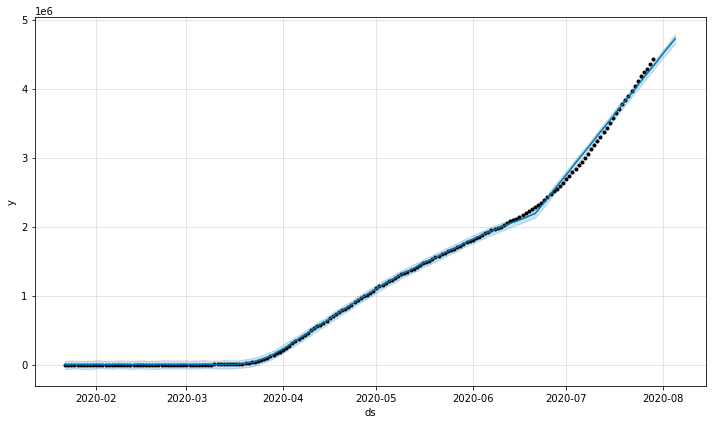

In [ ]:
confirmed_us_forecast_plot = m.plot(forecast_us)

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed_us)
future_us= m.make_future_dataframe(periods=60)
future_us.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
245,2020-09-23
246,2020-09-24
247,2020-09-25
248,2020-09-26
249,2020-09-27


In [ ]:
forecast_us = m.predict(future_us)
forecast_us[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
245,2020-09-23,7.485895e+06,6.748394e+06,8.232950e+06
246,2020-09-24,7.541091e+06,6.751770e+06,8.330621e+06
247,2020-09-25,7.601242e+06,6.832715e+06,8.408747e+06
248,2020-09-26,7.659390e+06,6.853590e+06,8.487235e+06
249,2020-09-27,7.714673e+06,6.885435e+06,8.532620e+06


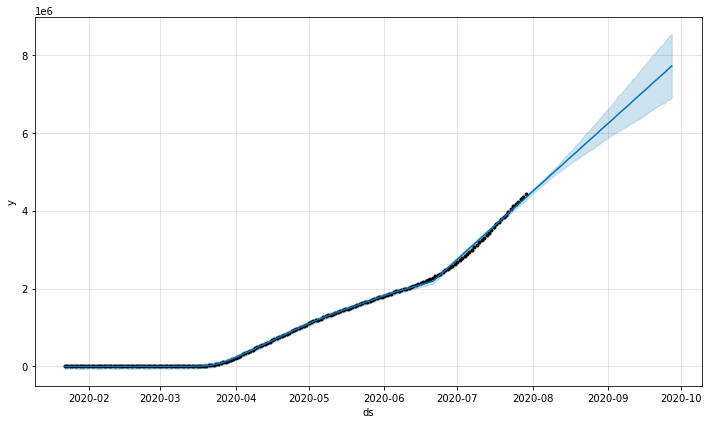

In [ ]:
confirmed_us_forecast_plot = m.plot(forecast_us)

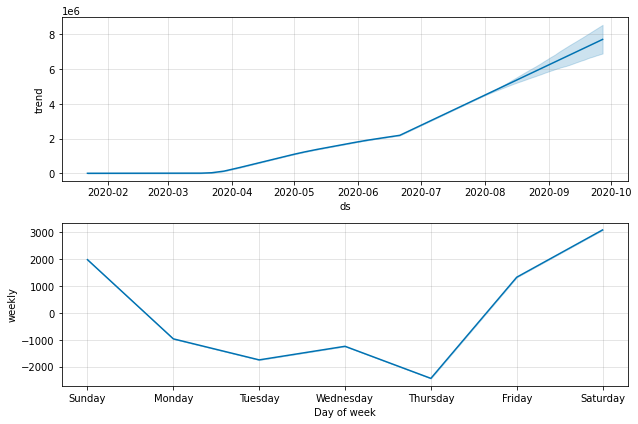

In [ ]:
confirmed_forecast_plot = m.plot_components(forecast_us)

In [ ]:
deaths_us.columns = ['ds','y']
deaths_us['ds'] = pd.to_datetime(deaths_us['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths_us)
future = m.make_future_dataframe(periods=60)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
245,2020-09-23
246,2020-09-24
247,2020-09-25
248,2020-09-26
249,2020-09-27


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
245,2020-09-23,190671.243038,147222.650455,234247.886917
246,2020-09-24,191657.998296,147152.144272,235720.944401
247,2020-09-25,192557.124645,146663.599829,237997.744425
248,2020-09-26,193214.186018,146530.987246,240292.892629
249,2020-09-27,193652.527358,145573.012309,241455.793643


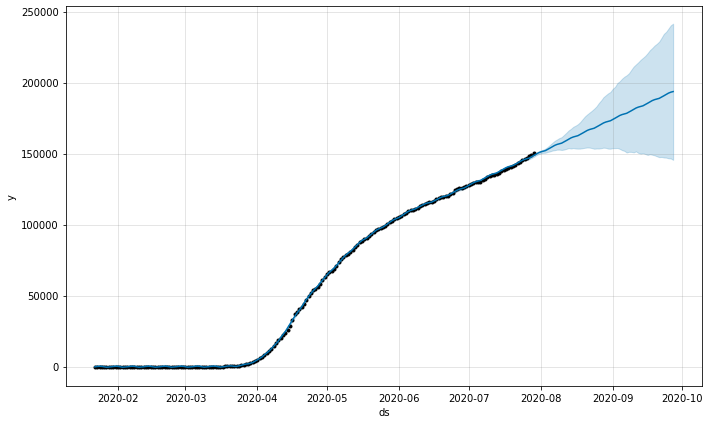

In [ ]:
deaths_us_forecast_plot = m.plot(forecast)

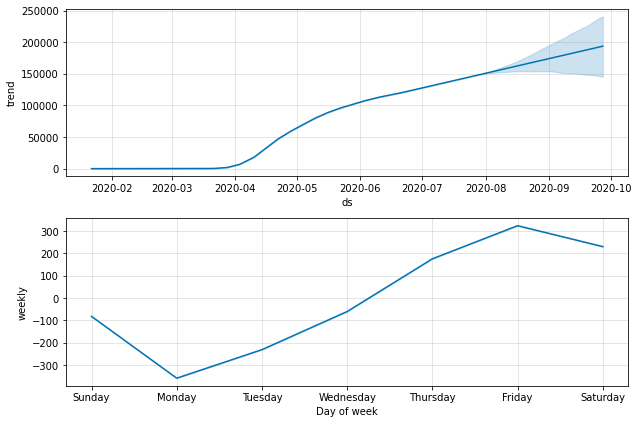

In [ ]:
deaths_us_forecast_plot = m.plot_components(forecast)

In [ ]:
recovered_us.columns = ['ds','y']
recovered_us['ds'] = pd.to_datetime(recovered_us['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(recovered_us)
future = m.make_future_dataframe(periods=60)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
245,2020-09-23
246,2020-09-24
247,2020-09-25
248,2020-09-26
249,2020-09-27


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
245,2020-09-23,2.450753e+06,2.184678e+06,2.738365e+06
246,2020-09-24,2.469339e+06,2.199898e+06,2.756695e+06
247,2020-09-25,2.489585e+06,2.215544e+06,2.784579e+06
248,2020-09-26,2.512197e+06,2.228911e+06,2.820850e+06
249,2020-09-27,2.529899e+06,2.237098e+06,2.847467e+06


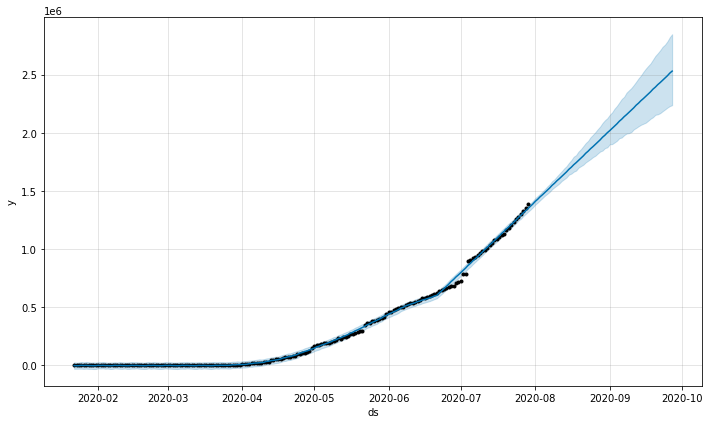

In [ ]:
recovered_us_forecast_plot = m.plot(forecast)

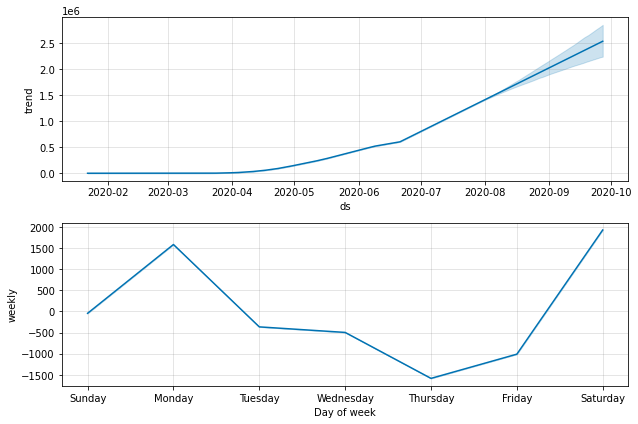

In [ ]:
recovered_us_forecast_plot = m.plot_components(forecast)

In [ ]:
brazil

,Date,Confirmed,Deaths,Recovered
0,01-23-2020,0,0,0
1,02-26-2020,1,0,0
2,02-27-2020,1,0,0
3,02-28-2020,1,0,0
4,02-29-2020,2,0,0
...,...,...,...,...
151,07-25-2020,2394513,86449,1785359
152,07-26-2020,2419091,87004,1812913
153,07-27-2020,2442375,87618,1846641
154,07-28-2020,2483191,88539,1868749


In [ ]:
brazil.groupby('Date').sum().head()

,Confirmed,Deaths,Recovered
Date,,,
01-23-2020,0,0,0
02-26-2020,1,0,0
02-27-2020,1,0,0
02-28-2020,1,0,0
02-29-2020,2,0,0


In [ ]:
brazil.groupby('Date').sum().tail()

,Confirmed,Deaths,Recovered
Date,,,
07-25-2020,2394513,86449,1785359
07-26-2020,2419091,87004,1812913
07-27-2020,2442375,87618,1846641
07-28-2020,2483191,88539,1868749
07-29-2020,2552265,90134,1922802


In [ ]:
confirmed_brazil = brazil.groupby('Date').sum()['Confirmed'].reset_index()
deaths_brazil = brazil.groupby('Date').sum()['Deaths'].reset_index()
recovered_brazil = brazil.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed_brazil['Date'], y=confirmed_brazil['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths_brazil['Date'], y=deaths_brazil['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered_brazil['Date'], y=recovered_brazil['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='BRAZIL NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [ ]:
confirmed_brazil.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed_brazil['ds'] = pd.to_datetime(confirmed_brazil['ds'])

In [ ]:
confirmed_brazil.tail(4)

,ds,y
152,2020-07-26,2419091
153,2020-07-27,2442375
154,2020-07-28,2483191
155,2020-07-29,2552265


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed_brazil)
future_brazil= m.make_future_dataframe(periods=7)
future_brazil.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
158,2020-08-01
159,2020-08-02
160,2020-08-03
161,2020-08-04
162,2020-08-05


In [ ]:
forecast_brazil = m.predict(future_brazil)
forecast_brazil[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(2)

,ds,yhat,yhat_lower,yhat_upper
161,2020-08-04,2.732561e+06,2.712016e+06,2.753429e+06
162,2020-08-05,2.775495e+06,2.752245e+06,2.799122e+06


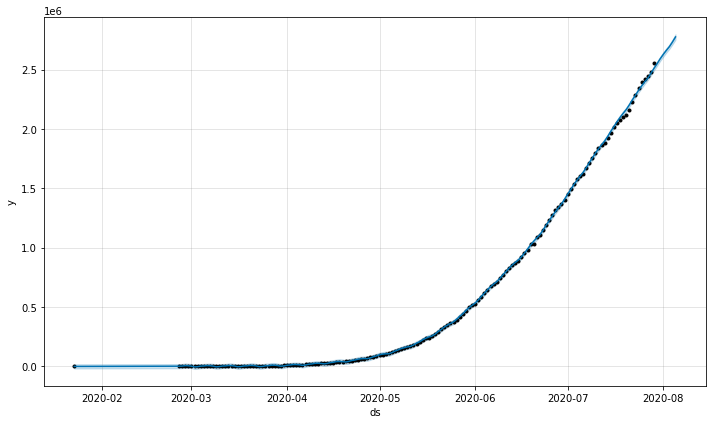

In [ ]:
confirmed_brazil_forecast_plot = m.plot(forecast_brazil)

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed_brazil)
future_brazil= m.make_future_dataframe(periods=60)
future_brazil.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
211,2020-09-23
212,2020-09-24
213,2020-09-25
214,2020-09-26
215,2020-09-27


In [ ]:
forecast_brazil = m.predict(future_brazil)
forecast_brazil[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
211,2020-09-23,4.632560e+06,4.227513e+06,5.063224e+06
212,2020-09-24,4.671469e+06,4.249357e+06,5.116007e+06
213,2020-09-25,4.712684e+06,4.284763e+06,5.162232e+06
214,2020-09-26,4.749606e+06,4.310321e+06,5.213982e+06
215,2020-09-27,4.783861e+06,4.322897e+06,5.257491e+06


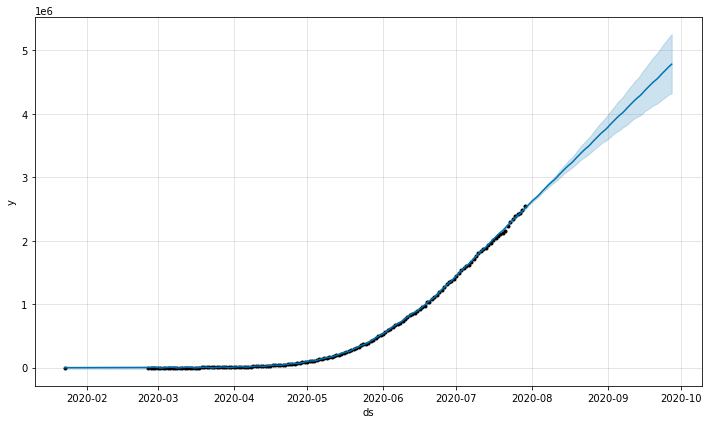

In [ ]:
confirmed_brazil_forecast_plot = m.plot(forecast_brazil)

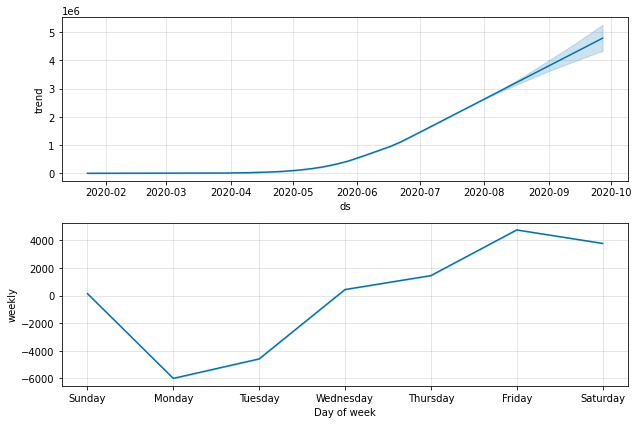

In [ ]:
confirmed_brazil_forecast_plot = m.plot_components(forecast_brazil)

In [ ]:
deaths_brazil.columns = ['ds','y']
deaths_brazil['ds'] = pd.to_datetime(deaths_brazil['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths_brazil)
future = m.make_future_dataframe(periods=60)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
211,2020-09-23
212,2020-09-24
213,2020-09-25
214,2020-09-26
215,2020-09-27


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
211,2020-09-23,148464.725317,137888.052291,159212.539449
212,2020-09-24,149635.548191,138789.747223,160470.385120
213,2020-09-25,150745.176145,139698.858159,161856.928554
214,2020-09-26,151782.592178,140533.712017,163138.563622
215,2020-09-27,152588.454357,141208.310360,164130.906926


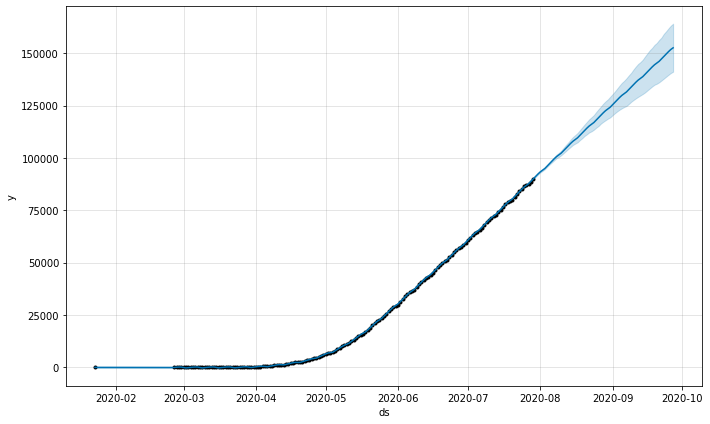

In [ ]:
deaths_brazil_forecast_plot = m.plot(forecast)

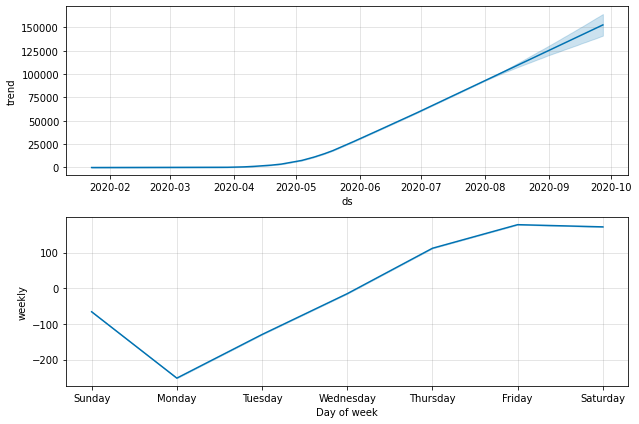

In [ ]:
deaths_brazil_forecast_plot = m.plot_components(forecast)

In [ ]:
recovered_brazil.columns = ['ds','y']
recovered_brazil['ds'] = pd.to_datetime(recovered_brazil['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(recovered_brazil)
future = m.make_future_dataframe(periods=60)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
211,2020-09-23
212,2020-09-24
213,2020-09-25
214,2020-09-26
215,2020-09-27


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
211,2020-09-23,3.874014e+06,3.504529e+06,4.251625e+06
212,2020-09-24,3.906902e+06,3.527953e+06,4.294011e+06
213,2020-09-25,3.943294e+06,3.561984e+06,4.354734e+06
214,2020-09-26,3.979080e+06,3.578449e+06,4.397140e+06
215,2020-09-27,4.010461e+06,3.592769e+06,4.438728e+06


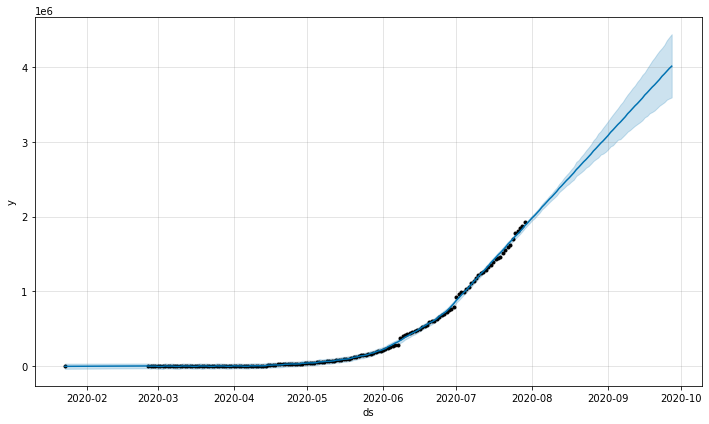

In [ ]:
recovered_brazil_forecast_plot = m.plot(forecast)

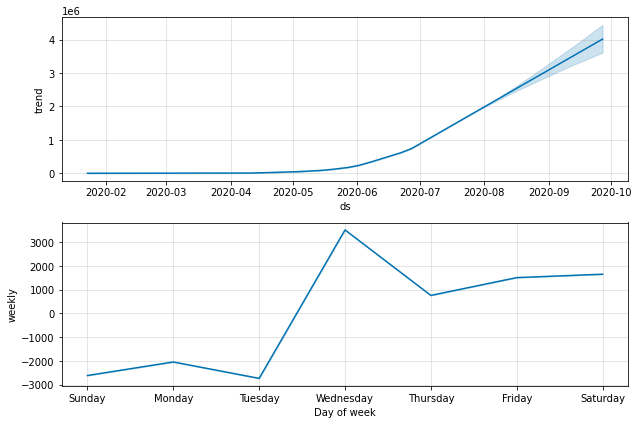

In [ ]:
recovered_brazil_forecast_plot = m.plot_components(forecast)

In [ ]:
italy,uk

(           Date  Confirmed  Deaths  Recovered
 0    01-31-2020          2       0          0
 1    02-01-2020          2       0          0
 2    02-02-2020          2       0          0
 3    02-03-2020          2       0          0
 4    02-04-2020          2       0          0
 ..          ...        ...     ...        ...
 176  07-25-2020     245864   35102     198320
 177  07-26-2020     246118   35107     198446
 178  07-27-2020     246286   35112     198593
 179  07-28-2020     246488   35123     198756
 180  07-29-2020     246776   35129     199031
 
 [181 rows x 4 columns],            Date  Confirmed  Deaths  Recovered
 0    01-31-2020          2       0          0
 1    02-01-2020          2       0          0
 2    02-02-2020          2       0          0
 3    02-03-2020          2       0          0
 4    02-04-2020          2       0          0
 ..          ...        ...     ...        ...
 176  07-25-2020     300270   45823       1427
 177  07-26-2020     301020   4583

In [ ]:
italy.groupby('Date').sum().head(),uk.groupby('Date').sum().head()

(            Confirmed  Deaths  Recovered
 Date                                    
 01-31-2020          2       0          0
 02-01-2020          2       0          0
 02-02-2020          2       0          0
 02-03-2020          2       0          0
 02-04-2020          2       0          0,
             Confirmed  Deaths  Recovered
 Date                                    
 01-31-2020          2       0          0
 02-01-2020          2       0          0
 02-02-2020          2       0          0
 02-03-2020          2       0          0
 02-04-2020          2       0          0)

In [ ]:
italy.groupby('Date').sum().tail(),uk.groupby('Date').sum().tail()

(            Confirmed  Deaths  Recovered
 Date                                    
 07-25-2020     245864   35102     198320
 07-26-2020     246118   35107     198446
 07-27-2020     246286   35112     198593
 07-28-2020     246488   35123     198756
 07-29-2020     246776   35129     199031,
             Confirmed  Deaths  Recovered
 Date                                    
 07-25-2020     300270   45823       1427
 07-26-2020     301020   45837       1434
 07-27-2020     301708   45844       1437
 07-28-2020     302295   45963       1438
 07-29-2020     303063   46046       1438)

In [ ]:
confirmed_italy = italy.groupby('Date').sum()['Confirmed'].reset_index()
deaths_italy = italy.groupby('Date').sum()['Deaths'].reset_index()
recovered_italy = italy.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed_italy['Date'], y=confirmed_italy['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths_italy['Date'], y=deaths_italy['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered_italy['Date'], y=recovered_italy['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Italy NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [ ]:
confirmed_italy.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed_italy['ds'] = pd.to_datetime(confirmed_italy['ds'])

In [ ]:
confirmed_italy.tail(4)

,ds,y
177,2020-07-26,246118
178,2020-07-27,246286
179,2020-07-28,246488
180,2020-07-29,246776


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed_italy)
future_italy= m.make_future_dataframe(periods=7)
future_italy.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
183,2020-08-01
184,2020-08-02
185,2020-08-03
186,2020-08-04
187,2020-08-05


In [ ]:
forecast_italy = m.predict(future_italy)
forecast_italy[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(2)

,ds,yhat,yhat_lower,yhat_upper
186,2020-08-04,247755.569187,243465.945488,252566.761400
187,2020-08-05,247976.843467,242635.777990,254323.147704


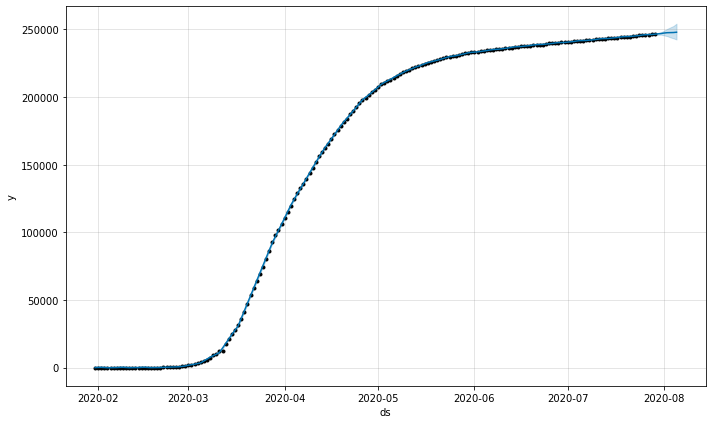

In [ ]:
confirmed_italy_forecast_plot = m.plot(forecast_italy)

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed_italy)
future_italy= m.make_future_dataframe(periods=60)
future_italy.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
236,2020-09-23
237,2020-09-24
238,2020-09-25
239,2020-09-26
240,2020-09-27


In [ ]:
forecast_italy = m.predict(future_italy)
forecast_italy[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
236,2020-09-23,258229.615115,144866.296384,366250.367129
237,2020-09-24,258386.700586,142927.180559,368916.368684
238,2020-09-25,258735.226327,141814.763399,371609.068078
239,2020-09-26,259091.429817,139801.873004,374984.031107
240,2020-09-27,259344.676920,137714.323968,378352.266629


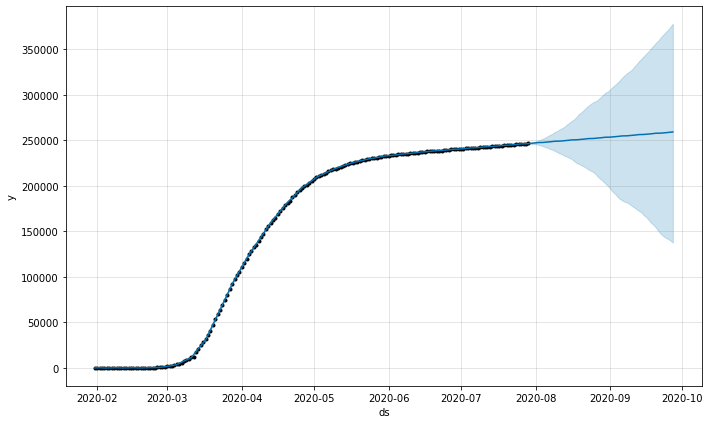

In [ ]:
confirmed_italy_forecast_plot = m.plot(forecast_italy)

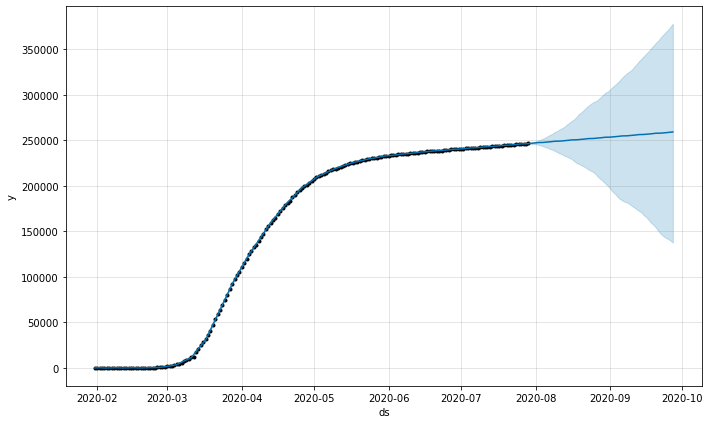

In [ ]:
confirmed_italy_forecast_plot = m.plot(forecast_italy)

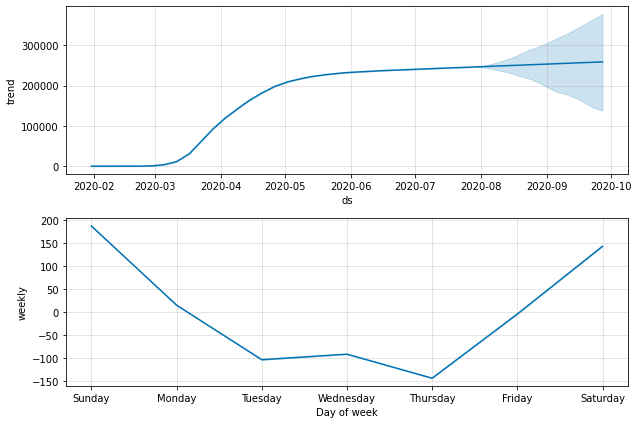

In [ ]:
confirmed_italy_forecast_plot = m.plot_components(forecast_italy)

In [ ]:
confirmed_uk = uk.groupby('Date').sum()['Confirmed'].reset_index()
deaths_uk = uk.groupby('Date').sum()['Deaths'].reset_index()
recovered_uk = uk.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed_uk['Date'], y=confirmed_uk['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths_uk['Date'], y=deaths_uk['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered_uk['Date'], y=recovered_uk['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='UK NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [ ]:
confirmed_uk.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed_uk['ds'] = pd.to_datetime(confirmed_uk['ds'])

In [ ]:
confirmed_uk.tail(4)

,ds,y
177,2020-07-26,301020
178,2020-07-27,301708
179,2020-07-28,302295
180,2020-07-29,303063


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed_uk)
future_uk= m.make_future_dataframe(periods=7)
future_uk.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
183,2020-08-01
184,2020-08-02
185,2020-08-03
186,2020-08-04
187,2020-08-05


In [ ]:
forecast_uk = m.predict(future_uk)
forecast_uk[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(2)

,ds,yhat,yhat_lower,yhat_upper
186,2020-08-04,293130.117672,285093.360993,301468.852433
187,2020-08-05,292973.988465,283996.438203,302417.360830


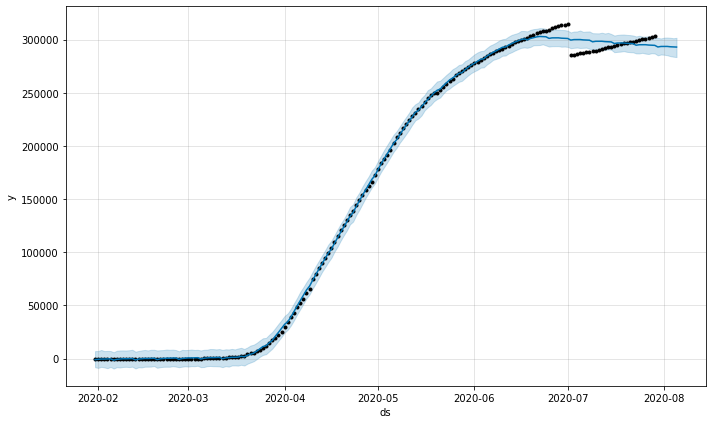

In [ ]:
confirmed_uk_forecast_plot = m.plot(forecast_uk)

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed_uk)
future_uk= m.make_future_dataframe(periods=60)
future_uk.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
236,2020-09-23
237,2020-09-24
238,2020-09-25
239,2020-09-26
240,2020-09-27


In [ ]:
forecast_uk = m.predict(future_uk)
forecast_uk[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
236,2020-09-23,281664.048259,172722.306191,390160.270710
237,2020-09-24,280139.721956,169922.452342,390460.977917
238,2020-09-25,280612.647583,170312.299223,392312.942452
239,2020-09-26,280652.028002,166944.535622,396119.871543
240,2020-09-27,280648.812819,162249.826874,400417.886581


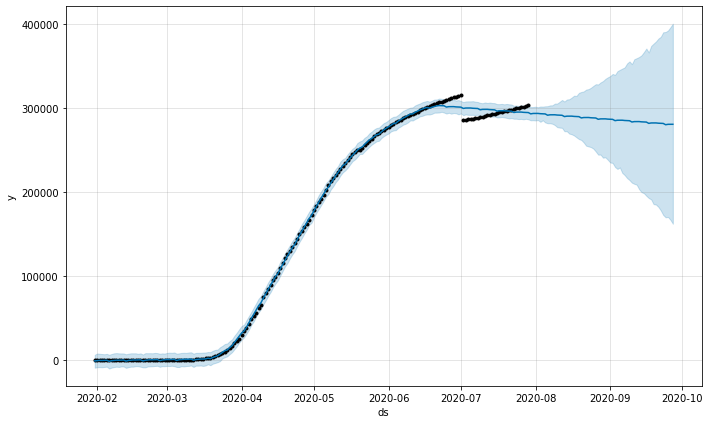

In [ ]:
confirmed_uk_forecast_plot = m.plot(forecast_uk)

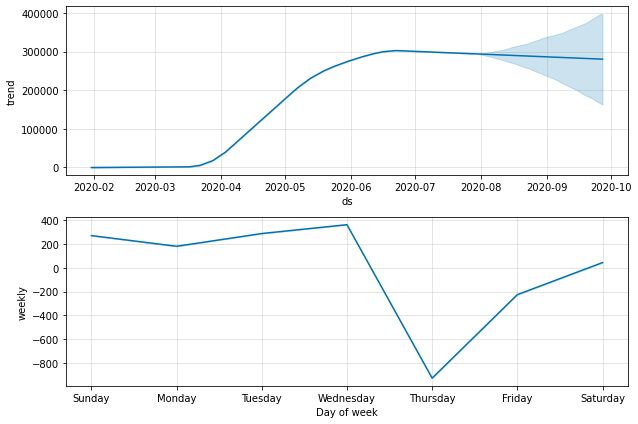

In [ ]:
confirmed_uk_forecast_plot = m.plot_components(forecast_uk)